## Map of ASEAN Countries on Transverse-Mercator Projection

Author: swatchai kriengkraipet

Summaries:
- This is Jupyter notebook
- Requires: Python 2.7 + matplotlib + cartopy + etc. packages
- Prepared for my github depository: https://github.com/swatchai/cartopy_asean_proj

TODO:
- labeling
- ticks
- legend

In [1]:
%matplotlib inline

Advantages for using TM:
- shapes of areas are preserved
- good for areas with NS longer than EW
- curved meridians 

Disadvantages:
- difficult to plot labels with Cartopy
- moderate scale errors
- Myanmar looks much greater latitude

#### Creating a Sub-class of Cartopy's Existing Map Projection

In [2]:
import cartopy   # v 0.14
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# TransverseMercator central_longitude=115, others=defaults; see help below
# good due to symmetry N/S, central_longitude=115

class asean_tm(cartopy.crs.TransverseMercator):
    """
    TM projection for ASEAN domain.
    Ellipsoid is wgs84 (default)

    """
    def __init__(self):
        globe = cartopy.crs.Globe()  # default globe: wgs1984
        super(asean_tm, self).__init__(central_longitude=115, scale_factor=1.0, globe=globe)

    @property
    def x_limits(self):
        return (-2.95e6, 3.35e6)

    @property
    def y_limits(self):
        return (-1.5e6, 3.75e6)

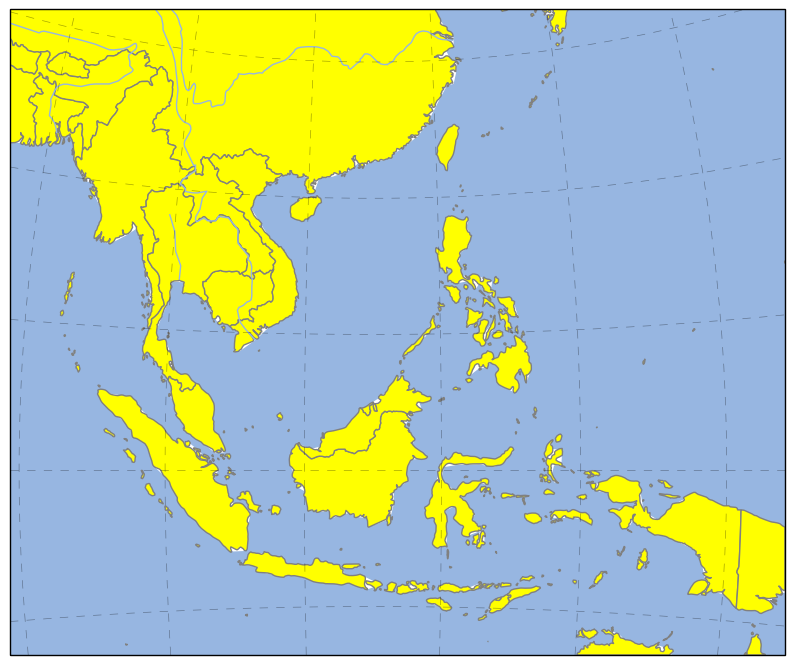

In [3]:
# This creates a plot of all ASEAN countries on TM projection with ...
# - oceans
# - coast lines
# - country boundaries (admin-0)
# - major rivers

# TODO: 
# - switches for layers ON/OFF
# - to set colors choices individually

import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

watercolor = cfeature.COLORS['water']

plt.figure(figsize=(10, 12))  # width x height in inches 

ax = plt.axes( projection=asean_tm() )   # make use of the proj

# feature: physical/110m_ocean.shp
# type: polygon
ax.add_feature(cfeature.OCEAN, facecolor=watercolor)  

# feature: country shapes at medium scale
# type: polygon
admin0_50m = cfeature.NaturalEarthFeature('cultural', 'admin_0_countries', '50m', 
                                          edgecolor='gray', facecolor='yellow')
ax.add_feature(admin0_50m)

# set True to plot rivers, set False to skip
major_rivers = True
if major_rivers:
    # 110m_rivers_lake_centerlines
    ax.add_feature(cfeature.RIVERS, edgecolor=watercolor, facecolor='none')
    
# ax.coastlines(resolution='110m', color='black')

# set True to plot roads, set False to skip
road_10m_f = False
if road_10m_f:
    roads_10m = cfeature.NaturalEarthFeature('cultural', 'roads', '10m', 
                                             edgecolor='red', facecolor='none')
    ax.add_feature(roads_10m)

# for visual inspection of map distortion
# set True to plot indicatrix, set False to skip 
plot_tissot = False
if plot_tissot:
    lats = range(-20,40,5)
    lons = range(80,150,5)
    ax.tissot(rad_km=150000.0, lons=lons, lats=lats, n_samples=40, facecolor='gray', alpha=0.25)

    
gl = ax.gridlines(draw_labels=False, \
                  xlocs=[80,90,100,110,120,130,140,150], \
                  ylocs=[-20,-10,0,10,20,30,40], \
                  linestyle='--', \
                  edgecolor='blue', \
                  alpha=0.35)  # parrallels/meridians
    
# Ticks -- error: Cannot handle non-rectangular coordinate systems.
# ax.set_xticks([80,90,100,110,120,130,140,150], minor=False, crs=ccrs.Geodetic())

#TypeError: Cannot label gridlines on a this plot.  Only PlateCarree and Mercator plots are currently supported.
#gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
#                  linewidth=1, color='gray', alpha=0.3, linestyle='--')

plt.show()

---

About some warning messages:

When Tissot indicatrices are plotted, warning message says "some approx...". Nothing to worry, it is acceptable.

... \cartopy\mpl\geoaxes.py:586: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x00000000140C4FC0> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))

